In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# load raw data

file_path = 'bv_body_data/predict/'
image = np.load (file_path + 'image.npy', mmap_mode='r')
label = np.load (file_path + 'label.npy', mmap_mode='r')

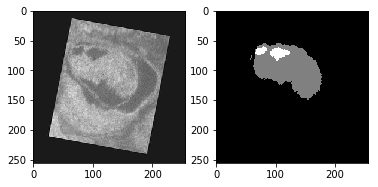

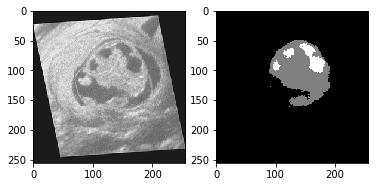

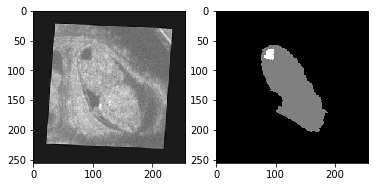

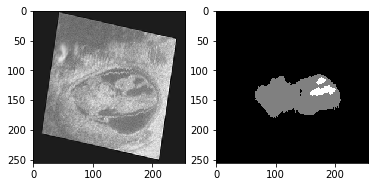

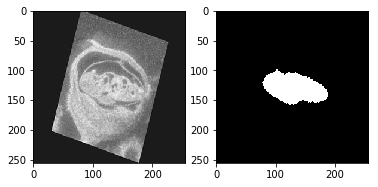

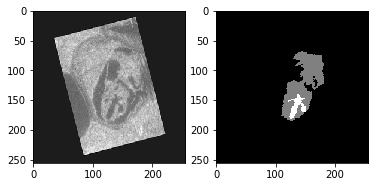

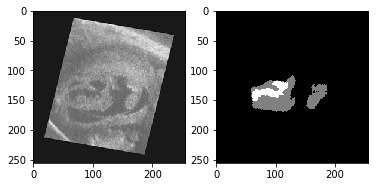

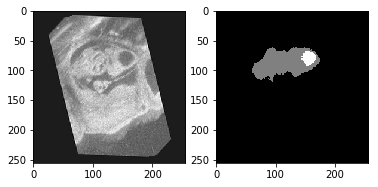

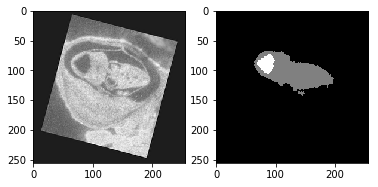

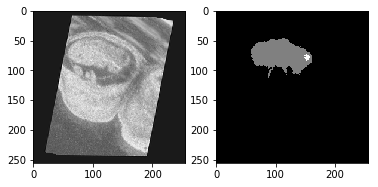

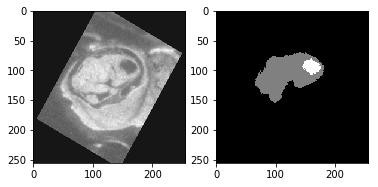

In [8]:
from dataset import *
from niiutility import *

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

dataset = niiDataset(image, label, 
                         transform=transforms.Compose([
                             RandomRotate(30)
                         ])
                     )

for i in range(len(dataset)):
    sample = dataset[i]

    show_image(sample['image'], sample['label'])
    
    if i == 10:
        break

In [7]:
from loss import *

print(image.shape, label.shape)

temp_image = torch.from_numpy(np.repeat (image[0:2, :,:,:],3,1).astype(np.float32))
temp_label = label[0:2,:,:,:,:].astype(np.float32)

print(temp_image.shape, temp_label.shape)

dice_loss(temp_image, temp_label)

(99, 1, 192, 256, 256) (99, 1, 192, 256, 256)
torch.Size([2, 3, 192, 256, 256]) (2, 1, 192, 256, 256)


tensor(0.6691)